In [99]:
from pylab import *
import pandas as pd
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [100]:
import re
from nltk.stem import WordNetLemmatizer

In [101]:
data = pd.read_csv("/content/data_essay.csv")
data.head()

,essay_id,essay,essay_set,score
0,1,"Dear local newspaper, I think effects computer...",1,8
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,5,"Dear @LOCATION1, I know having computers has a...",1,8


Checking for the same essay id

In [102]:
data['essay_id'].duplicated().any()

True

In [103]:
data['essay'].duplicated().any()

True

In [104]:
data.shape

(14776, 4)

In [105]:
data['essay_set'].duplicated().any()

True

In [106]:
data.essay.nunique()

12972

In [107]:
data.essay_id.nunique()

12976

In [108]:
dataquery = data.query('essay_set==2')
dataquery.head()

,essay_id,essay,essay_set,score
1783,2978,Certain materials being removed from libraries...,2,4
1784,2978,Certain materials being removed from libraries...,2,4
1785,2979,Write a persuasive essay to a newspaper reflec...,2,1
1786,2979,Write a persuasive essay to a newspaper reflec...,2,1
1787,2980,Do you think that libraries should remove cert...,2,2


In [109]:
data.shape

(14776, 4)

In [110]:
dataquery2 = data.query('essay_set==8')
dataquery2.head()

,essay_id,essay,essay_set,score
14053,20716,A long time ago when I was in third grade I h...,8,34
14054,20717,Softball has to be one of the single most gre...,8,46
14055,20718,"Some people like making people laugh, I love ...",8,40
14056,20719,"""LAUGHTER"" @CAPS1 I hang out with my friends...",8,30
14057,20721,Well ima tell a story about the time i got @CA...,8,26


In [111]:
dataquery3 = data.query('essay_set==9')
dataquery3.head()

,essay_id,essay,essay_set,score


In [112]:
data['essay_set'].head()

0    1
1    1
2    1
3    1
4    1
Name: essay_set, dtype: int64

In [113]:
dataquery3 = data.query('essay_set==7')
dataquery3.head()

,essay_id,essay,essay_set,score
12484,17834,Patience is when your waiting .I was patience ...,7,15
12485,17836,"I am not a patience person, like I cant sit i...",7,13
12486,17837,One day I was at basketball practice and I was...,7,15
12487,17838,I going to write about a time when I went to t...,7,17
12488,17839,It can be very hard for somebody to be patient...,7,13


In [114]:
data4 = data.groupby(['essay_id']).nunique()
data4.head()

,essay,essay_set,score
essay_id,,,
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
5,1,1,1


In [115]:
data4query3 = data4.query('essay_set==7')
data4query3.head()

,essay,essay_set,score
essay_id,,,


We cannot use groupby unique

In [116]:

data['score'].min()

0

In [117]:
data['score'].max()

60

In [118]:
data['essay_id'].max()

21633

In [119]:
data['essay_id'].min()

1

In [120]:
print(data.isnull().sum())

essay_id     0
essay        0
essay_set    0
score        0
dtype: int64


In [121]:
data['set1'] = np.where(data['essay_set']== 1 , 1, 0)


data['set2'] = np.where(data['essay_set']== 2, 1, 0)

data['set3'] = np.where(data['essay_set']== 3, 1, 0)
data['set4'] = np.where(data['essay_set']== 4, 1, 0)
data['set5'] = np.where(data['essay_set']== 5, 1, 0)
data['set6'] = np.where(data['essay_set']== 6, 1, 0)
data['set7'] = np.where(data['essay_set']== 7, 1, 0)
data['set8'] = np.where(data['essay_set']== 8, 1, 0)

data.head()

,essay_id,essay,essay_set,score,set1,set2,set3,set4,set5,set6,set7,set8
0,1,"Dear local newspaper, I think effects computer...",1,8,1,0,0,0,0,0,0,0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9,1,0,0,0,0,0,0,0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7,1,0,0,0,0,0,0,0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",1,10,1,0,0,0,0,0,0,0
4,5,"Dear @LOCATION1, I know having computers has a...",1,8,1,0,0,0,0,0,0,0


In [122]:
data2 = data.query("set2==1")
data2.head()

,essay_id,essay,essay_set,score,set1,set2,set3,set4,set5,set6,set7,set8
1783,2978,Certain materials being removed from libraries...,2,4,0,1,0,0,0,0,0,0
1784,2978,Certain materials being removed from libraries...,2,4,0,1,0,0,0,0,0,0
1785,2979,Write a persuasive essay to a newspaper reflec...,2,1,0,1,0,0,0,0,0,0
1786,2979,Write a persuasive essay to a newspaper reflec...,2,1,0,1,0,0,0,0,0,0
1787,2980,Do you think that libraries should remove cert...,2,2,0,1,0,0,0,0,0,0


In [123]:
data4 = data.query("set8==1")
data4.head()

,essay_id,essay,essay_set,score,set1,set2,set3,set4,set5,set6,set7,set8
14053,20716,A long time ago when I was in third grade I h...,8,34,0,0,0,0,0,0,0,1
14054,20717,Softball has to be one of the single most gre...,8,46,0,0,0,0,0,0,0,1
14055,20718,"Some people like making people laugh, I love ...",8,40,0,0,0,0,0,0,0,1
14056,20719,"""LAUGHTER"" @CAPS1 I hang out with my friends...",8,30,0,0,0,0,0,0,0,1
14057,20721,Well ima tell a story about the time i got @CA...,8,26,0,0,0,0,0,0,0,1


In [124]:
data = data.drop(columns=["essay_set"])
data.head()

,essay_id,essay,score,set1,set2,set3,set4,set5,set6,set7,set8
0,1,"Dear local newspaper, I think effects computer...",8,1,0,0,0,0,0,0,0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,0,0,0,0,0,0,0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,0,0,0,0,0,0,0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,0,0,0,0,0,0,0
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,0,0,0,0,0,0,0


In [125]:
data['essay'].head(1)

0    Dear local newspaper, I think effects computer...
Name: essay, dtype: object

In [126]:
!pip install difflib

ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib


In [127]:
data.iloc[:, 1].head(1)

0    Dear local newspaper, I think effects computer...
Name: essay, dtype: object

In [128]:
import difflib
test = data.iloc[:, 1].head(2)


data['similarity'] = data.apply(lambda x: difflib.SequenceMatcher(None, test, x.essay).ratio(), axis=1)
data.head()

,essay_id,essay,score,set1,set2,set3,set4,set5,set6,set7,set8,similarity
0,1,"Dear local newspaper, I think effects computer...",8,1,0,0,0,0,0,0,0,0.0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,0,0,0,0,0,0,0,0.0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,0,0,0,0,0,0,0,0.0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,0,0,0,0,0,0,0,0.0
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,0,0,0,0,0,0,0,0.0


In [129]:
data = data.drop(columns=["similarity"])
data.head()

,essay_id,essay,score,set1,set2,set3,set4,set5,set6,set7,set8
0,1,"Dear local newspaper, I think effects computer...",8,1,0,0,0,0,0,0,0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,0,0,0,0,0,0,0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,0,0,0,0,0,0,0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,0,0,0,0,0,0,0
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,0,0,0,0,0,0,0


In [130]:
dataset1 = data[(data['score'] ==1) | (data['score'] == 2) | (data['score'] == 3) | (data['score'] == 4) | (data['score'] == 5) | (data['score'] == 6) | (data['score'] == 7) | (data['score'] == 8) | (data['score'] == 9) | (data['score'] == 10) | (data['score'] == 11) | (data['score'] == '12')]

dataset1.head()

,essay_id,essay,score,set1,set2,set3,set4,set5,set6,set7,set8
0,1,"Dear local newspaper, I think effects computer...",8,1,0,0,0,0,0,0,0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,0,0,0,0,0,0,0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,0,0,0,0,0,0,0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,0,0,0,0,0,0,0
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,0,0,0,0,0,0,0


In [131]:
dataset1 = dataset1[(data['set1'] ==1)]
dataset1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,essay_id,essay,score,set1,set2,set3,set4,set5,set6,set7,set8
0,1,"Dear local newspaper, I think effects computer...",8,1,0,0,0,0,0,0,0
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,0,0,0,0,0,0,0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,0,0,0,0,0,0,0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,0,0,0,0,0,0,0
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,0,0,0,0,0,0,0


In [132]:
dataset1 = dataset1.drop(columns=["set2","set3","set4","set5","set6","set7","set8"])
dataset1.head()

,essay_id,essay,score,set1
0,1,"Dear local newspaper, I think effects computer...",8,1
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1
4,5,"Dear @LOCATION1, I know having computers has a...",8,1


In [133]:
grades = {
    12: "A+",
    11: "A",
    10: "B",
    9: "B-",
    8: "C",
    7: "C-",
    6: "D",
    5: "D-",
    4: "E",
    3: "E-",
    2: "F",
    1: "F+"
}

def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

In [134]:
letter_grades = dataset1["score"].map(grade_mapping)
dataset1["finalgrade"] = pd.Categorical(
    letter_grades, categories=grades.values(), ordered=True
)

In [135]:
dataset1.head()

,essay_id,essay,score,set1,finalgrade
0,1,"Dear local newspaper, I think effects computer...",8,1,C
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,1,B-
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,1,C-
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",10,1,B
4,5,"Dear @LOCATION1, I know having computers has a...",8,1,C


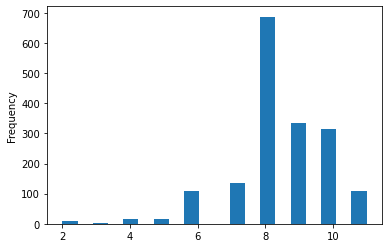

In [136]:
dataset1["score"].plot.hist(bins=20, label="Histogram")

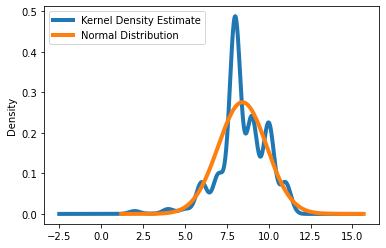

In [137]:
import scipy
dataset1["score"].plot.density(
    linewidth=4, label="Kernel Density Estimate"
)

final_mean = dataset1["score"].mean()
final_std = dataset1["score"].std()
x = np.linspace(final_mean - 5 * final_std, final_mean + 5 * final_std, 200)
normal_dist = scipy.stats.norm.pdf(x, loc=final_mean, scale=final_std)
plt.plot(x, normal_dist, label="Normal Distribution", linewidth=4)
plt.legend()
plt.show()

In [138]:
dataset1.finalgrade.value_counts()

C     687
B-    334
B     316
C-    135
D     110
A     109
E      17
D-     17
F      10
E-      1
F+      0
A+      0
Name: finalgrade, dtype: int64

In [139]:
dataset1['finalgrade'] = [1 if b=='C' else 0 for b in dataset1.finalgrade]
dataset1['finalgrade'].value_counts()

0    1049
1     687
Name: finalgrade, dtype: int64

In [140]:
# Separate majority and minority classes
from sklearn.utils import resample
dataset1_majority = dataset1[dataset1.finalgrade==0]
dataset1_minority = dataset1[dataset1.finalgrade==1]

dataset1_minority_upsampled = resample(dataset1_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1049,    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
dataset1 = pd.concat([dataset1_majority, dataset1_minority_upsampled])
# Display new class counts
dataset1.finalgrade.value_counts()

1    1049
0    1049
Name: finalgrade, dtype: int64

In [141]:
dataset1 = dataset1.drop(columns=["set1","score"])
dataset1.head()

,essay_id,essay,finalgrade
1,2,"Dear @CAPS1 @CAPS2, I believe that using compu...",0
2,3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0
3,4,"Dear Local Newspaper, @CAPS1 I have found that...",0
6,7,Did you know that more and more people these d...,0
7,8,@PERCENT1 of people agree that computers make ...,0


In [142]:
dataset1 = dataset1.drop(columns=["essay_id"])
dataset1.head()

,essay,finalgrade
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0
3,"Dear Local Newspaper, @CAPS1 I have found that...",0
6,Did you know that more and more people these d...,0
7,@PERCENT1 of people agree that computers make ...,0


In [143]:
!pip install transformers

In [144]:
import transformers
from transformers import AutoModel, BertTokenizerFast

In [145]:
!pip install torch

In [146]:
import torch
device = torch.device("cuda")

In [149]:
# split train dataset into train, validation and test sets
from sklearn.model_selection import train_test_split
train_text, temp_text, train_labels, temp_labels = train_test_split(dataset1['essay'],dataset1['finalgrade'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=dataset1['finalgrade'])


val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.3, 
                                                                stratify=temp_labels)

In [150]:

# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


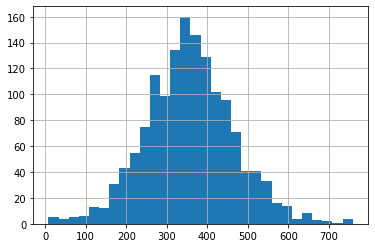

In [151]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [152]:
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 400,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [153]:
## convert lists to tensors

train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [154]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [155]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [156]:
import torch.nn as nn

In [157]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [158]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [159]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5)  

In [160]:

from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print("Class Weights:",class_weights)

Class Weights: [1. 1.]


In [161]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

In [162]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [163]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [164]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10

Evaluating...

Training Loss: 0.692
Validation Loss: 0.689

 Epoch 2 / 10

Evaluating...

Training Loss: 0.688
Validation Loss: 0.688

 Epoch 3 / 10

Evaluating...

Training Loss: 0.688
Validation Loss: 0.686

 Epoch 4 / 10

Evaluating...

Training Loss: 0.683
Validation Loss: 0.682

 Epoch 5 / 10

Evaluating...

Training Loss: 0.682
Validation Loss: 0.681

 Epoch 6 / 10

Evaluating...

Training Loss: 0.680
Validation Loss: 0.680

 Epoch 7 / 10

Evaluating...

Training Loss: 0.680
Validation Loss: 0.684

 Epoch 8 / 10

Evaluating...

Training Loss: 0.678
Validation Loss: 0.676

 Epoch 9 / 10

Evaluating...

Training Loss: 0.674
Validation Loss: 0.676

 Epoch 10 / 10

Evaluating...

Training Loss: 0.675
Validation Loss: 0.674


In [165]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [166]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [167]:
from sklearn.metrics import classification_report

preds = np.argmax(preds,axis=1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.62      0.32      0.42        95
           1       0.54      0.81      0.65        94

    accuracy                           0.56       189
   macro avg       0.58      0.56      0.53       189
weighted avg       0.58      0.56      0.53       189



In [169]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,preds))

0.5608465608465608
